In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the training and testing datasets
train_data = pd.read_csv('TrainingData.csv')
test_data = pd.read_csv('TestingData.csv')

# Separate features and target variable for training and testing data
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Standardize data ONLY for SVM
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

In [ ]:
### Part 1: Original Classifiers

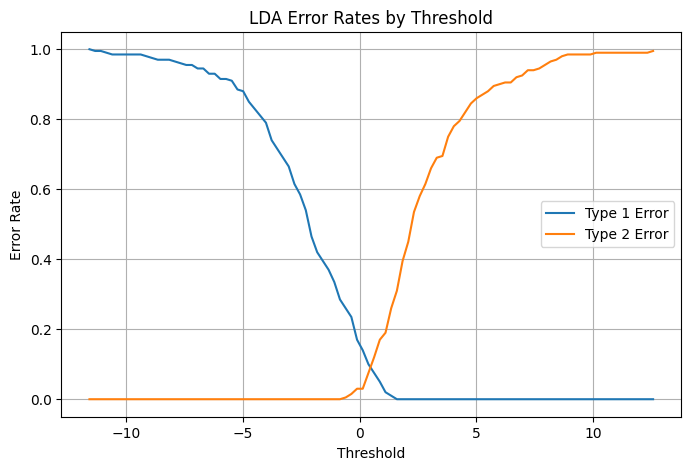

In [ ]:
# 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_test_proj = lda.decision_function(X_test)

# Evaluate LDA error rates across thresholds
thresholds = np.linspace(y_test_proj.min(), y_test_proj.max(), 100)
type1_errors_lda, type2_errors_lda = [], []
for threshold in thresholds:
    y_pred = (y_test_proj >= threshold).astype(int)
    type1_error = np.sum((y_pred == 1) & (y_test == 0)) / 200
    type2_error = np.sum((y_pred == 0) & (y_test == 1)) / 200
    type1_errors_lda.append(type1_error)
    type2_errors_lda.append(type2_error)

# Plot LDA Error Rates
plt.figure(figsize=(8, 5))
plt.plot(thresholds, type1_errors_lda, label="Type 1 Error")
plt.plot(thresholds, type2_errors_lda, label="Type 2 Error")
plt.title("LDA Error Rates by Threshold")
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.legend()
plt.grid()
plt.show()

Decision Tree - Type 1 Error: 0.175 Type 2 Error: 0.16
 


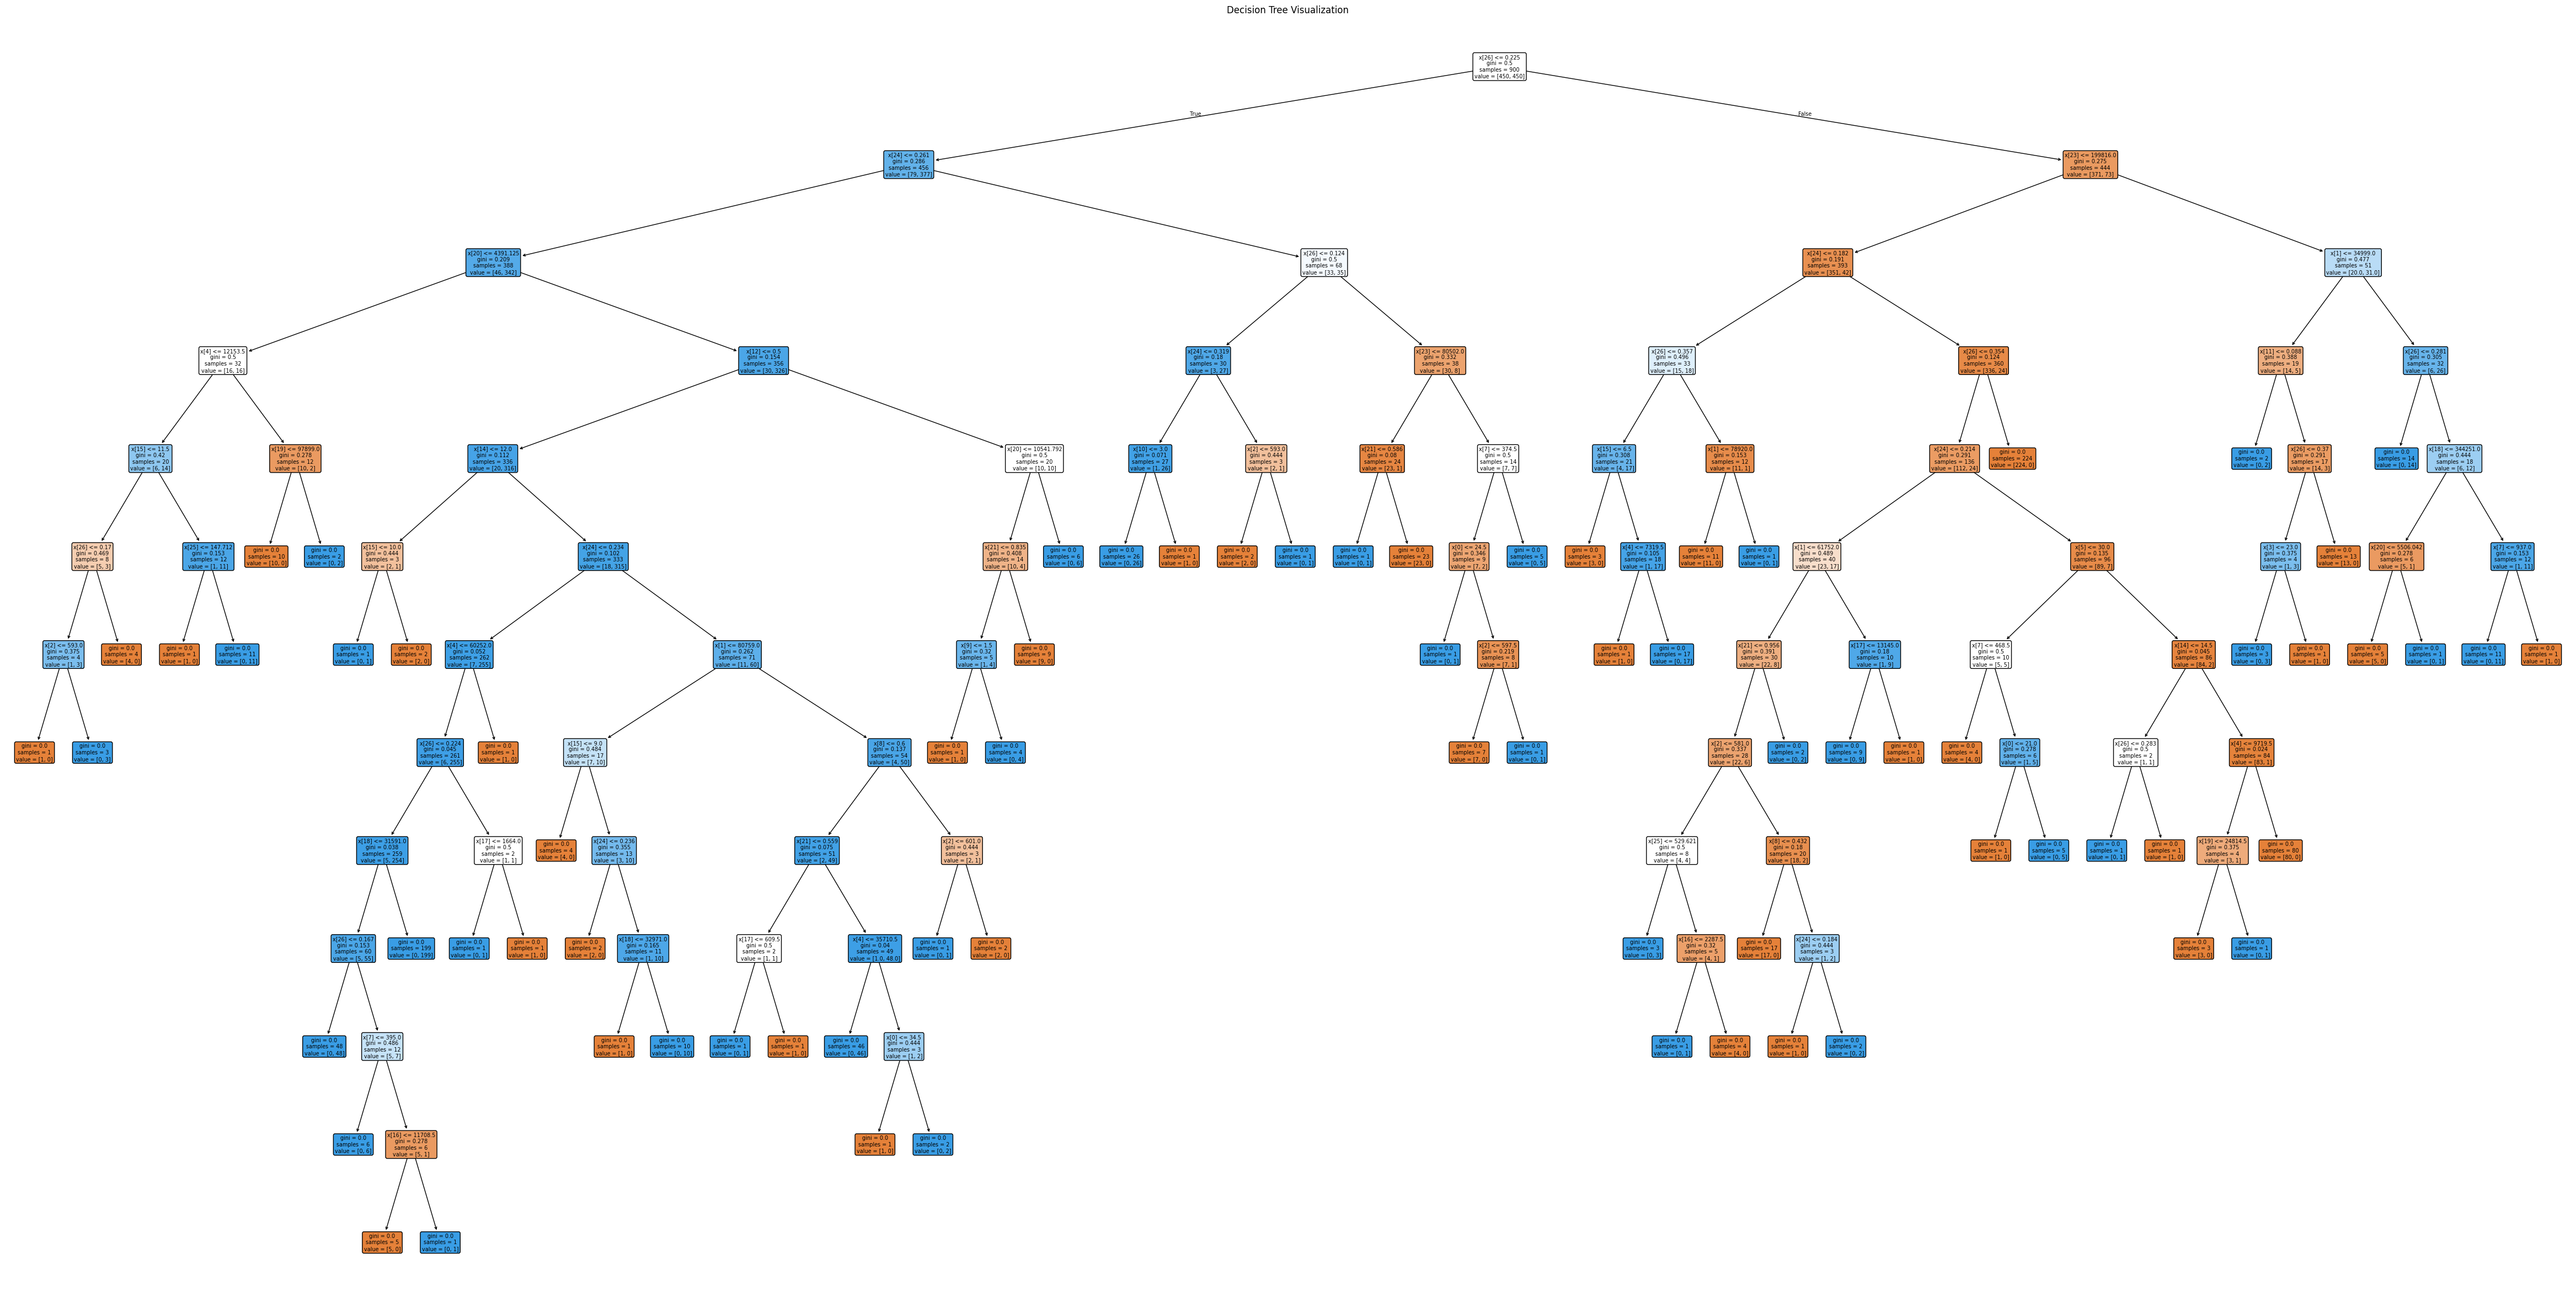

In [ ]:
# 2. Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
type1_error_dt = np.sum((y_pred_dt == 1) & (y_test == 0)) / 200
type2_error_dt = np.sum((y_pred_dt == 0) & (y_test == 1)) / 200
print("Decision Tree - Type 1 Error:", type1_error_dt, "Type 2 Error:", type2_error_dt)
print (" ")

#Visualize the decision tree
plt.figure(figsize=(60, 30))
plot_tree(decision_tree, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

kNN (k=1) - Type 1 Error: 0.25 Type 2 Error: 0.185
kNN (k=3) - Type 1 Error: 0.185 Type 2 Error: 0.17
kNN (k=5) - Type 1 Error: 0.2 Type 2 Error: 0.135
kNN (k=10) - Type 1 Error: 0.17 Type 2 Error: 0.165
 


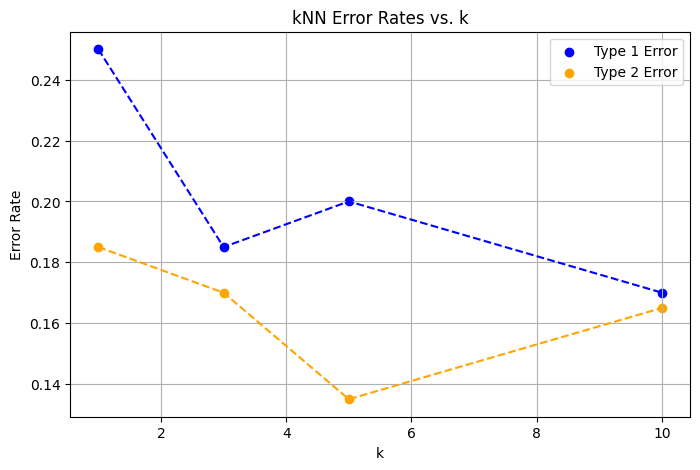

In [ ]:
# 3. k-Nearest Neighbors (kNN) for different k values
k_values = [1, 3, 5, 10]
type1_errors_knn, type2_errors_knn = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    type1_error = np.sum((y_pred_knn == 1) & (y_test == 0)) / 200
    type2_error = np.sum((y_pred_knn == 0) & (y_test == 1)) / 200
    type1_errors_knn.append(type1_error)
    type2_errors_knn.append(type2_error)
    print(f"kNN (k={k}) - Type 1 Error:", type1_error, "Type 2 Error:", type2_error)

print(" ")

# Plot kNN Error Rates vs. k
plt.figure(figsize=(8, 5))
plt.scatter(k_values, type1_errors_knn, label="Type 1 Error", color="blue")
plt.scatter(k_values, type2_errors_knn, label="Type 2 Error", color="orange")
plt.plot(k_values, type1_errors_knn, color="blue", linestyle="--")
plt.plot(k_values, type2_errors_knn, color="orange", linestyle="--")
plt.title("kNN Error Rates vs. k")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.legend()
plt.grid()
plt.show()

SVM - Type 1 Error: 0.125 Type 2 Error: 0.02
 


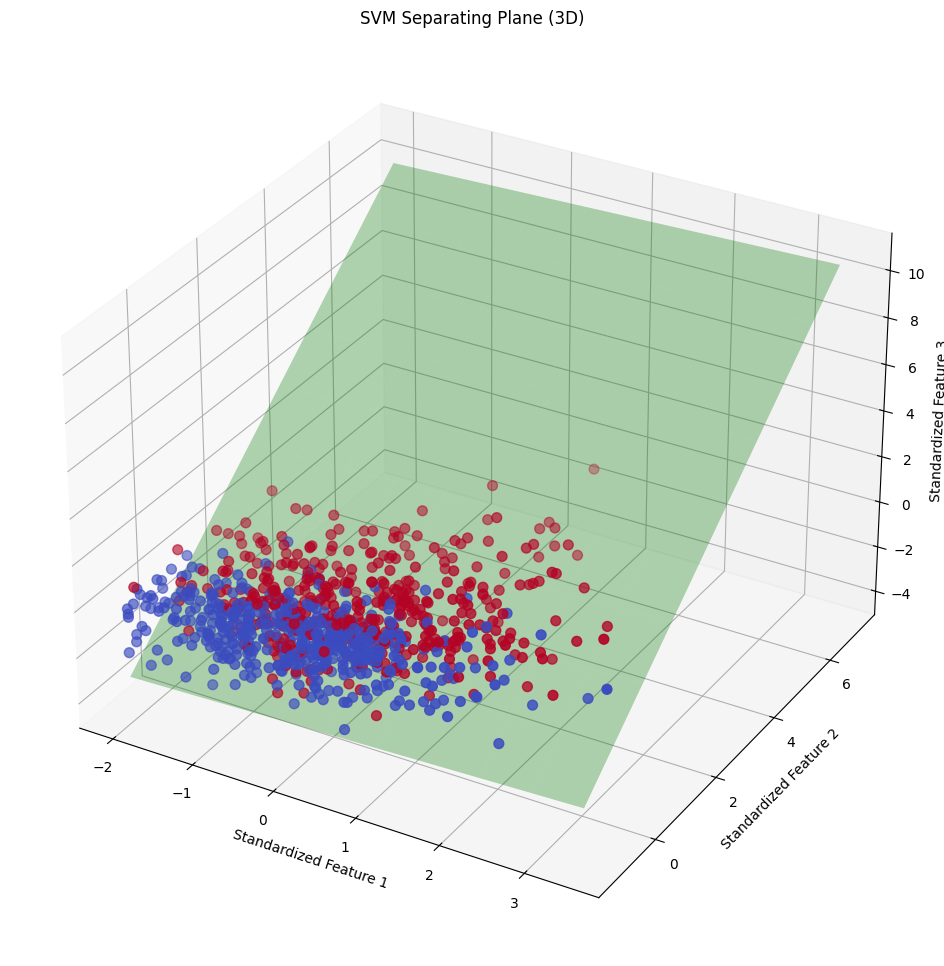

In [ ]:
# 4. Support Vector Machine (SVM) with Standardization and 3D plot for Separating Plane

svm_3d = SVC(kernel='linear', C=1)
svm_3d.fit(X_train_svm, y_train)    # Standardize data ONLY for SVM since the dataset othewrwise will take forever to fit the model
y_pred_svm = svm_3d.predict(X_test_svm)
type1_error_svm = np.sum((y_pred_svm == 1) & (y_test == 0)) / 200
type2_error_svm = np.sum((y_pred_svm == 0) & (y_test == 1)) / 200
print("SVM - Type 1 Error:", type1_error_svm, "Type 2 Error:", type2_error_svm)
print(" ")

# 3D Plot for SVM separating plane with standardized data
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_svm[:, 0], X_train_svm[:, 1], X_train_svm[:, 2], c=y_train, cmap='coolwarm', s=50)

# Create a mesh grid for plotting decision boundary
coef = svm_3d.coef_.ravel()
intercept = svm_3d.intercept_
xx, yy = np.meshgrid(np.linspace(X_train_svm[:, 0].min(), X_train_svm[:, 0].max(), 10),
                     np.linspace(X_train_svm[:, 1].min(), X_train_svm[:, 1].max(), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3)
ax.set_title("SVM Separating Plane (3D)")
ax.set_xlabel("Standardized Feature 1")
ax.set_ylabel("Standardized Feature 2")
ax.set_zlabel("Standardized Feature 3")
plt.show()

In [ ]:
### Part 2: kNN and SVM with PCA for Comparison

In [ ]:
# PCA and Comparison for kNN and SVM
pca_ks = [5, 10, 15]
comparison_data = {
    'PCA_K': [],
    'Classifier': [],
    'Type 1 Error': [],
    'Type 2 Error': []
}

for K in pca_ks:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # kNN with PCA for each K
    knn_pca = KNeighborsClassifier(n_neighbors=K)
    knn_pca.fit(X_train_pca, y_train)
    y_pred_knn_pca = knn_pca.predict(X_test_pca)
    type1_error_knn_pca = np.sum((y_pred_knn_pca == 1) & (y_test == 0)) / 200
    type2_error_knn_pca = np.sum((y_pred_knn_pca == 0) & (y_test == 1)) / 200
    comparison_data['PCA_K'].append(K)
    comparison_data['Classifier'].append('kNN with PCA')
    comparison_data['Type 1 Error'].append(type1_error_knn_pca)
    comparison_data['Type 2 Error'].append(type2_error_knn_pca)
    print(f"kNN (K={K}) - Type 1 Error (with PCA):", type1_error_knn_pca, "Type 2 Error (with PCA):", type2_error_knn_pca)

    # SVM with PCA for each K (standardized)
    X_train_pca_svm = scaler.fit_transform(X_train_pca)
    X_test_pca_svm = scaler.transform(X_test_pca)
    svm_pca = SVC(kernel='linear', C=1)
    svm_pca.fit(X_train_pca_svm, y_train)
    y_pred_svm_pca = svm_pca.predict(X_test_pca_svm)
    type1_error_svm_pca = np.sum((y_pred_svm_pca == 1) & (y_test == 0)) / 200
    type2_error_svm_pca = np.sum((y_pred_svm_pca == 0) & (y_test == 1)) / 200
    comparison_data['PCA_K'].append(K)
    comparison_data['Classifier'].append('SVM with PCA')
    comparison_data['Type 1 Error'].append(type1_error_svm_pca)
    comparison_data['Type 2 Error'].append(type2_error_svm_pca)
    print(f"SVM (K={K}) - Type 1 Error (with PCA):", type1_error_svm_pca, "Type 2 Error (with PCA):", type2_error_svm_pca)
    print(" ")


kNN (K=5) - Type 1 Error (with PCA): 0.19 Type 2 Error (with PCA): 0.125
SVM (K=5) - Type 1 Error (with PCA): 0.14 Type 2 Error (with PCA): 0.115
 
kNN (K=10) - Type 1 Error (with PCA): 0.17 Type 2 Error (with PCA): 0.165
SVM (K=10) - Type 1 Error (with PCA): 0.135 Type 2 Error (with PCA): 0.11
 
kNN (K=15) - Type 1 Error (with PCA): 0.19 Type 2 Error (with PCA): 0.13
SVM (K=15) - Type 1 Error (with PCA): 0.125 Type 2 Error (with PCA): 0.055
 


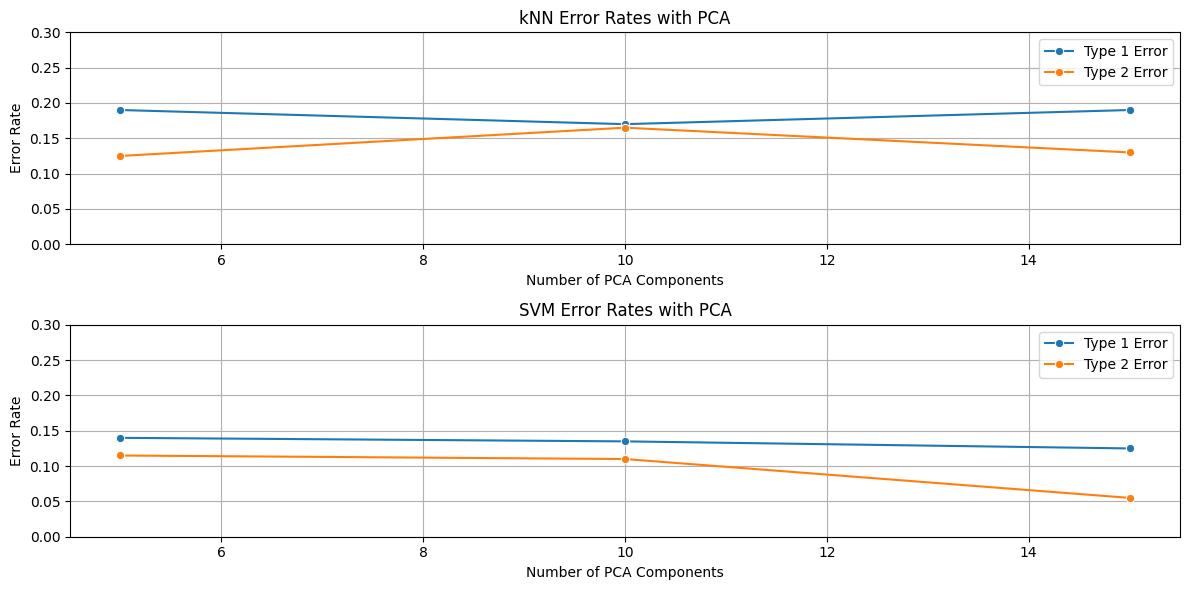

In [ ]:
# Comparison Plots: Type 1 and Type 2 Errors for kNN and SVM with PCA
import seaborn as sns

# Convert the comparison data to a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Create separate DataFrames for kNN and SVM
knn_comparison = comparison_df[comparison_df['Classifier'] == 'kNN with PCA']
svm_comparison = comparison_df[comparison_df['Classifier'] == 'SVM with PCA']

plt.figure(figsize=(12, 6))

# Plot for kNN Type 1 and Type 2 Errors
plt.subplot(2, 1, 1)
sns.lineplot(data=knn_comparison, x="PCA_K", y="Type 1 Error", label="Type 1 Error", marker="o")
sns.lineplot(data=knn_comparison, x="PCA_K", y="Type 2 Error", label="Type 2 Error", marker="o")
plt.title("kNN Error Rates with PCA")
plt.xlabel("Number of PCA Components")
plt.ylabel("Error Rate")
plt.ylim(0, 0.3)  # Set y-axis limits for better visibility
plt.grid()
plt.legend()

# Plot for SVM Type 1 and Type 2 Errors
plt.subplot(2, 1, 2)
sns.lineplot(data=svm_comparison, x="PCA_K", y="Type 1 Error", label="Type 1 Error", marker="o")
sns.lineplot(data=svm_comparison, x="PCA_K", y="Type 2 Error", label="Type 2 Error", marker="o")
plt.title("SVM Error Rates with PCA")
plt.xlabel("Number of PCA Components")
plt.ylabel("Error Rate")
plt.ylim(0, 0.3)  # Set y-axis limits for better visibility
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()